In [1]:
print('Hello World')

Hello World


Loading some required packages

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sp
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [3]:
os.getcwd()

'C:\\Users\\Nikhil\\paricipate'

Loading the data

In [4]:
os.chdir(r'D:\participate\Participants_Data_THL\Participants_Data_THL')

In [5]:
os.listdir()

['cor.csv',
 'sample_submission.csv',
 'submission_nikhil_dt.csv',
 'test.csv',
 'train.csv',
 'vif.csv',
 'vif1.csv']

In [6]:
trn=pd.read_csv('train.csv')
tst=pd.read_csv('test.csv')

In [7]:
print('train shape : {}'.format(trn.shape))
print('test shape : {}'.format(tst.shape))

train shape : (42748, 14)
test shape : (18321, 14)


In [8]:
#basic info about the data
trn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42748 entries, 0 to 42747
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   edible-poisonous      42748 non-null  object 
 1   cap-diameter          42748 non-null  float64
 2   cap-shape             42748 non-null  object 
 3   cap-color             42748 non-null  object 
 4   does-bruise-or-bleed  42748 non-null  object 
 5   gill-attachment       35808 non-null  object 
 6   gill-color            42748 non-null  object 
 7   stem-height           42748 non-null  float64
 8   stem-width            42748 non-null  float64
 9   stem-color            42748 non-null  object 
 10  has-ring              42748 non-null  object 
 11  ring-type             41029 non-null  object 
 12  habitat               42748 non-null  object 
 13  season                42748 non-null  object 
dtypes: float64(3), object(11)
memory usage: 4.6+ MB


In [9]:
#target variable
trn['season'].value_counts()

a    21103
u    16055
w     3698
s     1892
Name: season, dtype: int64

In [10]:
#season is categorical making them numerical
def season_binary(x):
    for i in x:
        if x=='a':
            return 0
        elif x=="u":
            return 1
        elif x=="w":
            return 2
        else:
            return 3

trn['season']=trn['season'].apply(season_binary)
trn['season'].value_counts()

0    21103
1    16055
2     3698
3     1892
Name: season, dtype: int64

In [11]:
tst.info()#checking data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18321 entries, 0 to 18320
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   edible-poisonous      18321 non-null  object 
 1   cap-diameter          18321 non-null  float64
 2   cap-shape             18321 non-null  object 
 3   cap-color             18321 non-null  object 
 4   does-bruise-or-bleed  18321 non-null  object 
 5   gill-attachment       15377 non-null  object 
 6   gill-color            18321 non-null  object 
 7   stem-height           18321 non-null  float64
 8   stem-width            18321 non-null  float64
 9   stem-color            18321 non-null  object 
 10  has-ring              18321 non-null  object 
 11  ring-type             17569 non-null  object 
 12  habitat               18321 non-null  object 
 13  season                0 non-null      float64
dtypes: float64(4), object(10)
memory usage: 2.0+ MB


In [12]:
#appending trn and tst table 
df=trn.append(tst)

In [13]:
#printing head and tail in df 
print(df.head())
print(df.tail())

  edible-poisonous  cap-diameter cap-shape cap-color does-bruise-or-bleed  \
0                p          5.75         x         n                    t   
1                p          2.27         o         g                    f   
2                p          5.59         c         y                    t   
3                p          0.74         x         p                    f   
4                p          9.60         x         n                    f   

  gill-attachment gill-color  stem-height  stem-width stem-color has-ring  \
0               s          w         6.13       14.93          w        f   
1               f          f         0.00        0.00          f        f   
2               x          p         5.47       11.27          w        f   
3               a          n         4.33        0.98          k        f   
4               a          w        10.84       28.52          w        f   

  ring-type habitat  season  
0         f       d     0.0  
1         f   

In [14]:
df.reset_index(inplace=True)# resetting index
df.drop('index',axis=1,inplace=True)# dropping index column

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   edible-poisonous      61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-color             61069 non-null  object 
 4   does-bruise-or-bleed  61069 non-null  object 
 5   gill-attachment       51185 non-null  object 
 6   gill-color            61069 non-null  object 
 7   stem-height           61069 non-null  float64
 8   stem-width            61069 non-null  float64
 9   stem-color            61069 non-null  object 
 10  has-ring              61069 non-null  object 
 11  ring-type             58598 non-null  object 
 12  habitat               61069 non-null  object 
 13  season                42748 non-null  float64
dtypes: float64(4), object(10)
memory usage: 6.5+ MB


In [16]:
#null value
print('train')
for i in trn.columns:
    print('null value percentage in column {} is {}% '.format(i,round(trn[i].isnull().sum()/len(trn)*100)))
print('--------------=--------------')
#null value
print('test')
for i in tst.columns:
    print('null value percentage in column {} is {}% '.format(i,round(tst[i].isnull().sum()/len(tst)*100)))
print('--------------=--------------')
#null value
print('master data')
for i in df.columns:
    print('null value percentage in column {} is {}% '.format(i,round(df[i].isnull().sum()/len(df)*100)))

train
null value percentage in column edible-poisonous is 0% 
null value percentage in column cap-diameter is 0% 
null value percentage in column cap-shape is 0% 
null value percentage in column cap-color is 0% 
null value percentage in column does-bruise-or-bleed is 0% 
null value percentage in column gill-attachment is 16% 
null value percentage in column gill-color is 0% 
null value percentage in column stem-height is 0% 
null value percentage in column stem-width is 0% 
null value percentage in column stem-color is 0% 
null value percentage in column has-ring is 0% 
null value percentage in column ring-type is 4% 
null value percentage in column habitat is 0% 
null value percentage in column season is 0% 
--------------=--------------
test
null value percentage in column edible-poisonous is 0% 
null value percentage in column cap-diameter is 0% 
null value percentage in column cap-shape is 0% 
null value percentage in column cap-color is 0% 
null value percentage in column does-bru

Missing value percentage is almost same 

##### Gill_attachment

In [17]:
df_null=df[pd.isnull(df).any(axis=1)]
df_null

,edible-poisonous,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
9,p,5.87,o,w,f,NaN,w,0.00,0.00,f,f,f,d,0.0
12,p,0.73,x,y,f,NaN,y,3.62,0.77,w,f,f,d,1.0
13,e,8.70,o,n,f,NaN,w,4.74,23.61,n,f,f,d,1.0
16,e,7.37,x,y,f,p,y,6.51,14.90,y,t,NaN,d,0.0
17,p,4.06,b,n,f,NaN,w,5.98,4.57,w,f,f,d,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,e,8.59,o,n,f,NaN,w,4.11,19.54,n,f,f,d,NaN
61065,e,7.23,s,w,f,d,p,3.56,9.42,w,f,f,d,NaN
61066,e,6.82,x,y,t,x,y,7.00,14.29,w,f,f,d,NaN
61067,p,4.51,x,n,f,s,p,6.25,9.97,w,t,z,d,NaN


In [18]:
con1=df['cap-color']=='n'
con2=df['cap-shape']=='o'

con_1_2=df[con1 & con2]

In [19]:
con3=df['gill-color']=='w'
con1_2_3=df[con1 & con2 & con3]
con1_2_3

,edible-poisonous,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
13,e,8.70,o,n,f,NaN,w,4.74,23.61,n,f,f,d,1.0
331,e,7.92,o,n,f,NaN,w,4.11,24.45,n,f,f,d,0.0
681,e,8.74,o,n,f,NaN,w,4.52,21.79,n,f,f,d,0.0
729,e,6.54,o,n,f,NaN,w,3.81,20.88,n,f,f,d,1.0
935,p,4.59,o,n,f,NaN,w,0.00,0.00,f,f,f,d,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60480,e,10.87,o,n,f,NaN,w,4.95,23.68,n,f,f,d,NaN
60575,e,7.92,o,n,f,NaN,w,4.38,23.00,n,f,f,d,NaN
60948,p,4.75,o,n,f,NaN,w,0.00,0.00,f,f,f,d,NaN
60973,p,5.65,o,n,f,NaN,w,0.00,0.00,f,f,f,d,NaN


In [20]:
con4=df['stem-color']=='n'
con5=df['stem-color']=='f'
df[con4 | con5]

,edible-poisonous,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
1,p,2.27,o,g,f,f,f,0.00,0.00,f,f,f,d,3.0
8,p,1.82,b,n,f,a,g,5.26,2.05,n,f,f,d,1.0
9,p,5.87,o,w,f,NaN,w,0.00,0.00,f,f,f,d,0.0
13,e,8.70,o,n,f,NaN,w,4.74,23.61,n,f,f,d,1.0
15,p,3.49,x,w,f,x,p,7.40,3.98,n,f,f,l,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61053,p,1.45,o,n,f,NaN,n,3.12,1.31,n,f,f,d,NaN
61061,p,20.14,x,o,f,p,y,5.81,39.53,n,f,f,d,NaN
61062,p,5.34,s,n,t,d,b,5.08,5.70,n,f,f,d,NaN
61064,e,8.59,o,n,f,NaN,w,4.11,19.54,n,f,f,d,NaN


In [21]:
rg_tp=df[pd.isnull(df['ring-type'])]
rg_tp.head()

,edible-poisonous,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
16,e,7.37,x,y,f,p,y,6.51,14.90,y,t,NaN,d,0.0
18,e,7.81,x,y,f,p,y,7.78,15.16,y,t,NaN,d,1.0
24,e,8.36,f,n,f,d,w,7.60,15.28,n,t,NaN,d,2.0
54,p,4.57,b,n,f,NaN,k,8.89,6.23,w,t,NaN,g,2.0
61,p,9.92,x,n,f,a,y,11.47,12.73,n,t,NaN,d,1.0


In [22]:
rg_tp['gill-attachment'].isnull().sum()

353

In [23]:
rg_tp['habitat'].value_counts()

d    1762
g     709
Name: habitat, dtype: int64

In [24]:
df['has-ring'].value_counts()

f    45890
t    15179
Name: has-ring, dtype: int64

In [25]:
tr=df[df['has-ring']=='t']

In [26]:
tr.head()

,edible-poisonous,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
5,e,9.24,x,n,t,e,p,8.52,17.52,w,t,p,l,0.0
16,e,7.37,x,y,f,p,y,6.51,14.90,y,t,NaN,d,0.0
18,e,7.81,x,y,f,p,y,7.78,15.16,y,t,NaN,d,1.0
24,e,8.36,f,n,f,d,w,7.60,15.28,n,t,NaN,d,2.0
27,p,11.21,s,p,t,d,p,8.43,15.04,p,t,f,d,1.0


In [27]:
df_n=df.copy()
df_n['gill-attachment']=df_n['gill-attachment'].fillna('Unknown')
df_n['ring-type']=df_n['ring-type'].fillna('unk')

<AxesSubplot:xlabel='gill-attachment'>

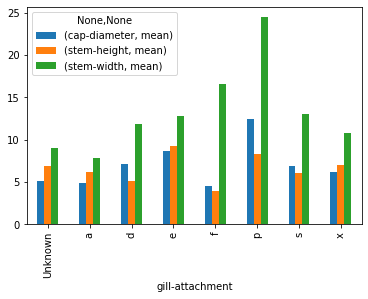

In [28]:
df_n.groupby('gill-attachment').agg({'cap-diameter':['mean'],'stem-height':['mean'],'stem-width':['mean']}).plot(kind='bar')

##### Ring_type

<AxesSubplot:xlabel='ring-type'>

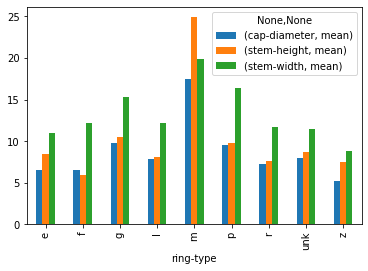

In [29]:
df_n.groupby('ring-type').agg({'cap-diameter':['mean'],'stem-height':['mean'],'stem-width':['mean']}).plot(kind='bar')

###### From above we cannot able to understand the pattern

In [30]:
df1=df.copy()

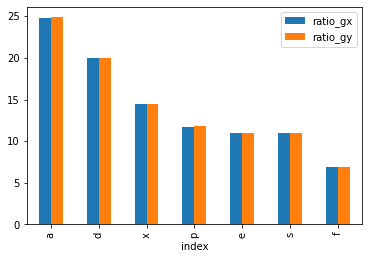

In [31]:
#filling the null values by using back fill method
df1['gill-attachment']=df1['gill-attachment'].fillna(method='bfill')

#creating a data frame of value_count for gill-attachment from df and df1

z_g=pd.DataFrame(df['gill-attachment'].value_counts(),columns=['gill-attachment']).reset_index()
z1_g=pd.DataFrame(df1['gill-attachment'].value_counts(),columns=['gill-attachment']).reset_index()
#merging both table on index

z_z1_g=pd.merge(z_g,z1_g,on='index')
#creating a column ratio for both gill-attachment to get a comparison 

z_z1_g['ratio_gx']=(z_z1_g['gill-attachment_x']/z_z1_g['gill-attachment_x'].sum())*100
z_z1_g['ratio_gy']=(z_z1_g['gill-attachment_y']/z_z1_g['gill-attachment_y'].sum())*100
#plotting a bar plot for comparrison

z_z1_g.plot(x="index", y=["ratio_gx", "ratio_gy"], kind="bar")
plt.show()

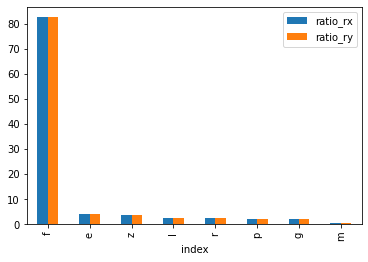

In [32]:
#filling the null values by using back fill method
df1['ring-type']=df1['ring-type'].fillna(method='bfill')

#creating a data frame of value_count for gill-attachment from df and df1
z=pd.DataFrame(df['ring-type'].value_counts(),columns=['ring-type']).reset_index()
z1=pd.DataFrame(df1['ring-type'].value_counts(),columns=['ring-type']).reset_index()

#merging both table on index column
z_z1=pd.merge(z,z1,on='index')

#creating a column ratio for both gill-attachment columns to get a comparison
z_z1['ratio_rx']=(z_z1['ring-type_x']/z_z1['ring-type_x'].sum())*100
z_z1['ratio_ry']=(z_z1['ring-type_y']/z_z1['ring-type_y'].sum())*100

#plotting a bar plot for comparrison
z_z1.plot(x="index", y=["ratio_rx", "ratio_ry"], kind="bar")
plt.show()

#### Ratio of gill attachment column  and ring type column maintained throughout the null value filling

### EDA

In [33]:
#making some function helpfull in EDA

# visualize the columns according to their data types
def plot(df,col):
    '''
    where df  = name of the dataframe
          col = name of the column
          
    required packages Pandas,matplotlib.pyplot and seaborn
    
    above function will give summary of the columns acoorrding to the data type.
    '''   
    #storing the column name and its data types in dictionary
    c={col:df[col].dtypes}
    
    #using key and value relation of dictionary plotting results
    print('------------------------------------------------------------------------------------------')
    if c[col]=='O':
        print('The feature is {} and number of categories are {}'.format(col,(df[col].nunique())))
        print('Value_count \n{}'.format(df[col].value_counts()))
        sns.countplot(df[col])
        plt.title("{} count plot".format(col))
        plt.show()
    else :
        print('summary of column {} \n{}'.format(col,df[col].describe()))
        sns.displot(x=df[col], data=df)
        plt.title("{} distribution chart".format(col))
        plt.show()
    print('------------------------------------------------------------------------------------------')    
    
#function for visualizing percentile
def perc(x,y):    
    """
    where x = dataframe with column name
          y=  column name
    require packages pandas and matplotlib.pyplot
    """
    #Creating the dataframe for percentiles 
    q=pd.DataFrame(x.describe(percentiles=[.01,.02,.03,.04,.05,.1,.15,.2,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95,.96,.97,.98,.99]))
    
    #Re-seting the index 
    q.reset_index(inplace=True)

    #Renaming column
    q.set_axis(['variables', y],inplace=True,axis=1)

    #Dropping the first row as it contain no. of observation only
    q.drop(labels=[0],axis=0,inplace=True)

    #Again reset the index
    q.reset_index(inplace=True)

    #dropping the unnecesary column
    q.drop(columns=["index"],inplace=True)

    #Visualizating the percentile with column 
    plt.figure(figsize=(8,6))
    plt.rcParams.update({'font.size': 14})# setting font size to 14
    plt.plot(q["variables"], q[y],color="red", marker="o")
    plt.xlabel("percentile",color="blue")
    plt.xticks(rotation ='vertical')
    plt.ylabel(y,color="green")
    plt.title("{} with mean,standard deviation and percentile distribution".format(y))
    plt.show()
    
#creating function for chi-square hypothesis test
def hypo_chi(x,y,z,i):
    """
    x=data_name["column1"]
    
    y=data_name["column2"]
    
    i=pvalue means if pvalue = .05 means confidence level is 95%
    
    required packages pandas and scipy.stats
    
    """
    print('Stating Hypothesis and confidence level:-')
    print('Ho: There is no relationship between {} & {}'.format(y,z))
    print('Ha: There is relationship/associativity between {} & {}'.format(y,z))
    print('confidence level= {}%'.format((1-i)*100))
    print('-------------------=-------------------')
    ob=pd.crosstab(x[y],x[z]) 
    calc_chisquare, pvalue, df, E=sp.chi2_contingency(ob)
    print('Result')
    if pvalue<i:
        print("We fail to accept Null Hypothesis(Ho) as p value {} is very low".format(pvalue))
    else:
        print("We accept Null Hypothesis(Ho) as p value {} is good enough".format(pvalue))

### Univariate_analysis-

------------------------------------------------------------------------------------------
The feature is edible-poisonous and number of categories are 2
Value_count 
p    33888
e    27181
Name: edible-poisonous, dtype: int64


C:\Users\Nikhil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


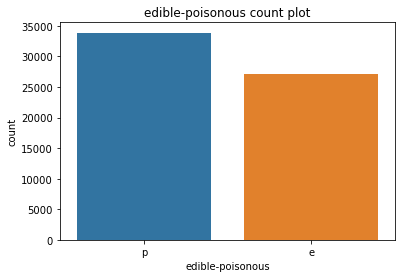

------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
summary of column cap-diameter 
count    61069.000000
mean         6.733854
std          5.264845
min          0.380000
25%          3.480000
50%          5.860000
75%          8.540000
max         62.340000
Name: cap-diameter, dtype: float64


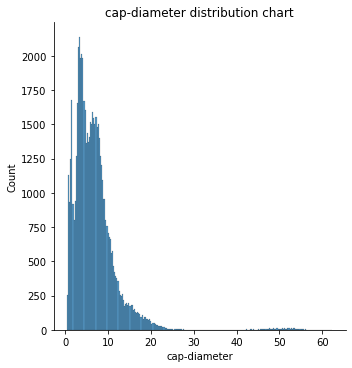

------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
The feature is cap-shape and number of categories are 7
Value_count 
x    26934
f    13404
s     7164
b     5694
o     3460
p     2598
c     1815
Name: cap-shape, dtype: int64


C:\Users\Nikhil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


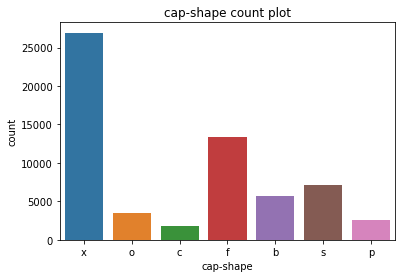

------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
The feature is cap-color and number of categories are 12
Value_count 
n    24218
y     8543
w     7666
g     4420
e     4035
o     3656
r     1782
u     1709
p     1703
k     1279
b     1230
l      828
Name: cap-color, dtype: int64


C:\Users\Nikhil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


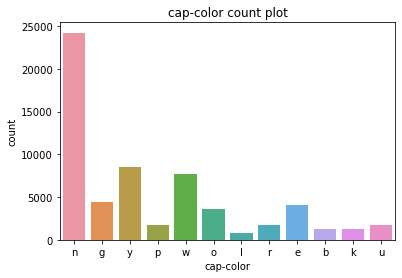

------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
The feature is does-bruise-or-bleed and number of categories are 2
Value_count 
f    50479
t    10590
Name: does-bruise-or-bleed, dtype: int64


C:\Users\Nikhil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


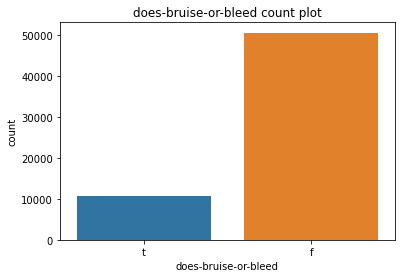

------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
The feature is gill-attachment and number of categories are 7
Value_count 
a    15185
d    12195
x     8841
p     7209
e     6739
s     6684
f     4216
Name: gill-attachment, dtype: int64


C:\Users\Nikhil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


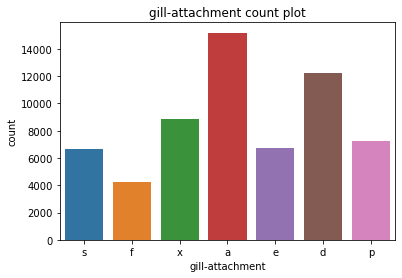

------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
The feature is gill-color and number of categories are 12
Value_count 
w    18521
n     9645
y     9546
p     5983
g     4118
f     3530
o     2909
k     2375
r     1399
e     1066
u     1023
b      954
Name: gill-color, dtype: int64


C:\Users\Nikhil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


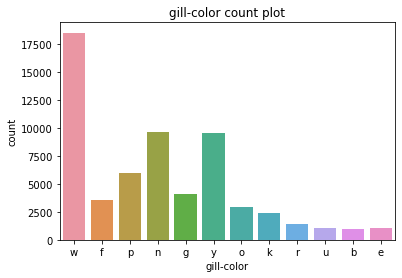

------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
summary of column stem-height 
count    61069.000000
mean         6.581538
std          3.370017
min          0.000000
25%          4.640000
50%          5.950000
75%          7.740000
max         33.920000
Name: stem-height, dtype: float64


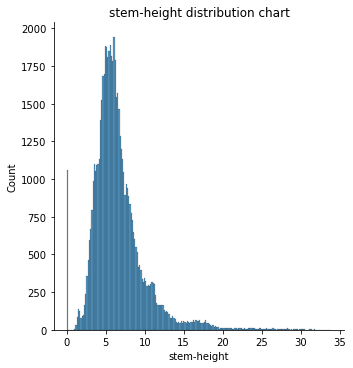

------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
summary of column stem-width 
count    61069.000000
mean        12.149410
std         10.035955
min          0.000000
25%          5.210000
50%         10.190000
75%         16.570000
max        103.910000
Name: stem-width, dtype: float64


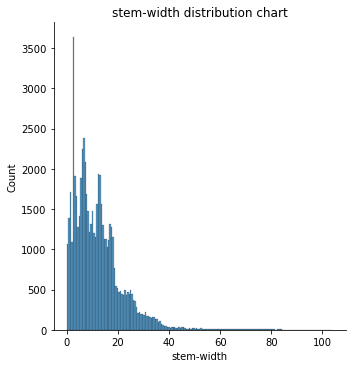

------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
The feature is stem-color and number of categories are 13
Value_count 
w    22926
n    18063
y     7865
g     2626
o     2187
e     2050
u     1490
f     1059
p     1025
k      837
r      542
l      226
b      173
Name: stem-color, dtype: int64


C:\Users\Nikhil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


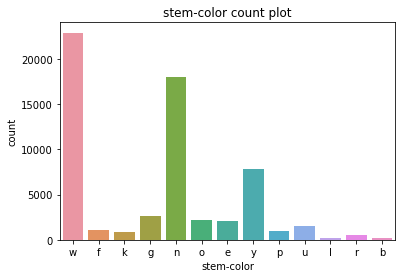

------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
The feature is has-ring and number of categories are 2
Value_count 
f    45890
t    15179
Name: has-ring, dtype: int64


C:\Users\Nikhil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


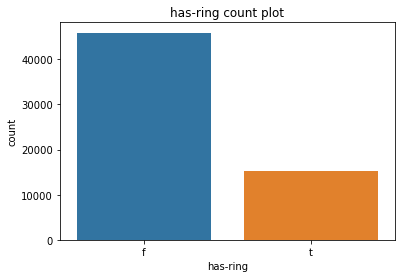

------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
The feature is ring-type and number of categories are 8
Value_count 
f    50418
e     2518
z     2192
l     1483
r     1467
p     1316
g     1303
m      372
Name: ring-type, dtype: int64


C:\Users\Nikhil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


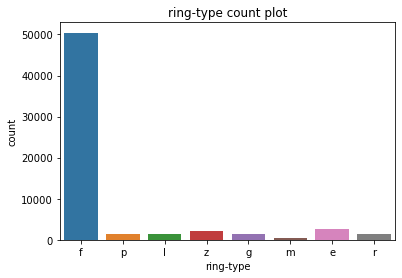

------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
The feature is habitat and number of categories are 8
Value_count 
d    44209
g     7943
l     3168
m     2920
h     2001
p      360
w      353
u      115
Name: habitat, dtype: int64


C:\Users\Nikhil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


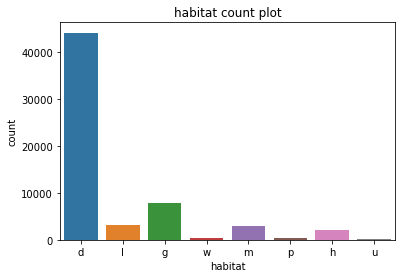

------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
summary of column season 
count    42748.000000
mean         0.681365
std          0.809748
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: season, dtype: float64


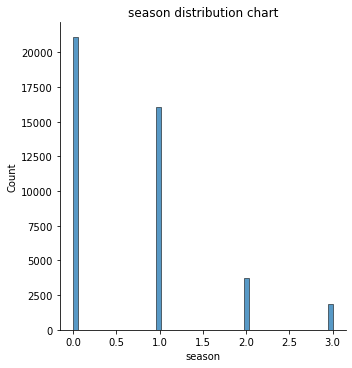

------------------------------------------------------------------------------------------


In [34]:
for i in df1.columns.values:
    plot(df1,i)

### BIVARIATE ANALYSIS

###### Checking relationship between the numerical variable 

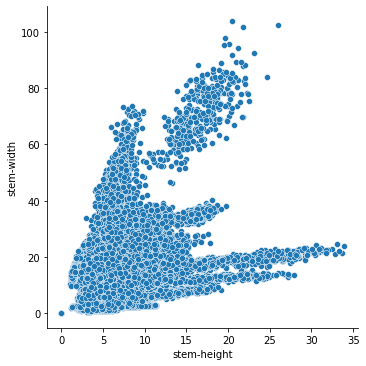

In [35]:
#stem-height with stem-width
sns.relplot(x="stem-height", y="stem-width",data=df1);

<p style="font-weight: bold;">stem width of mushrooms is showing a linear relationship with stem height</p>

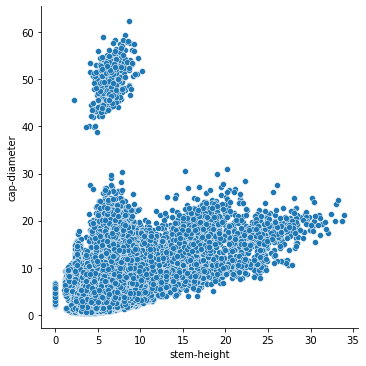

In [36]:
#stem-height with cap-diameter
sns.relplot(x='stem-height', y='cap-diameter',data=df1);

<p style="font-weight: bold;">Stem height of mushrooms is showing a linear relationship with cap diameter</p>

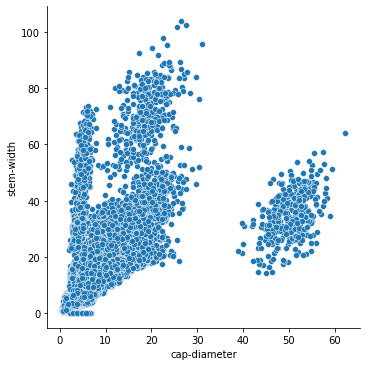

In [37]:
#stem-height with cap-diameter
sns.relplot(x='cap-diameter', y='stem-width',data=df1);

<p style="font-weight: bold;">stem width of mushrooms is showing a linear relationship with cap-diameter.</p>

###### Categorical Column with target variable

###### Using chi-squared hypothesis test-

In [38]:
for i in df1.columns.values:
    if df1[i].dtypes=='O':#
        # find the index no
        print('-----------------------------------------------------------------------------')
        index_no = df1.columns.get_loc(i)
        print('{}. {}'.format(index_no,i))
        hypo_chi(df1,'season',i,.05)
        print('-----------------------------------------------------------------------------')
        print('-----------------------------------------------------------------------------')

-----------------------------------------------------------------------------
0. edible-poisonous
Stating Hypothesis and confidence level:-
Ho: There is no relationship between season & edible-poisonous
Ha: There is relationship/associativity between season & edible-poisonous
confidence level= 95.0%
-------------------=-------------------
Result
We fail to accept Null Hypothesis(Ho) as p value 1.5158003793872496e-124 is very low
-----------------------------------------------------------------------------
-----------------------------------------------------------------------------
-----------------------------------------------------------------------------
2. cap-shape
Stating Hypothesis and confidence level:-
Ho: There is no relationship between season & cap-shape
Ha: There is relationship/associativity between season & cap-shape
confidence level= 95.0%
-------------------=-------------------
Result
We fail to accept Null Hypothesis(Ho) as p value 0.0 is very low
-------------------

<p style="font-weight: bold;">All the categorical variable are in good relationship with target variable</p>

###### Numerical Column with target variable season

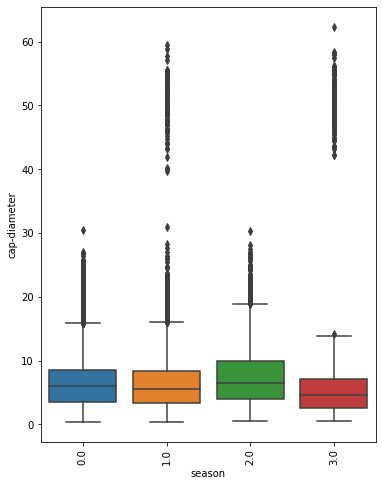

In [39]:
#boxplot will give the distribution
plt.figure(figsize=(6,8))
sns.boxplot(x='season',y='cap-diameter',data=df1)
plt.xticks(rotation='vertical')
plt.show()

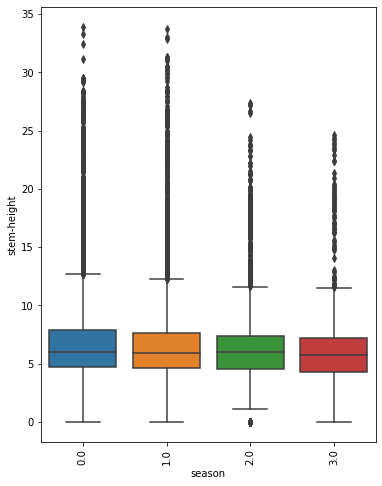

In [40]:
#boxplot will give the distribution
plt.figure(figsize=(6,8))
sns.boxplot(x='season',y='stem-height',data=df1)
plt.xticks(rotation='vertical')
plt.show()

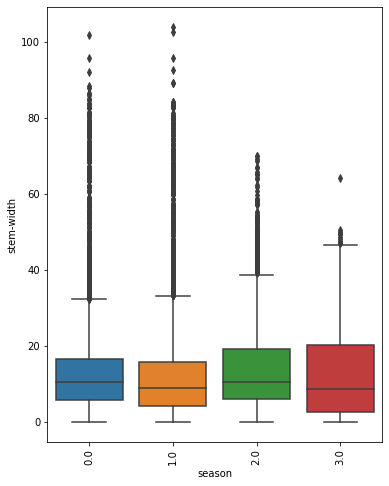

In [41]:
#boxplot will give the distribution
plt.figure(figsize=(6,8))
sns.boxplot(x='season',y='stem-width',data=df1)
plt.xticks(rotation='vertical')
plt.show()

### Outlier Treatment

<p style="font-weight: bold;">Stem-Width</p>

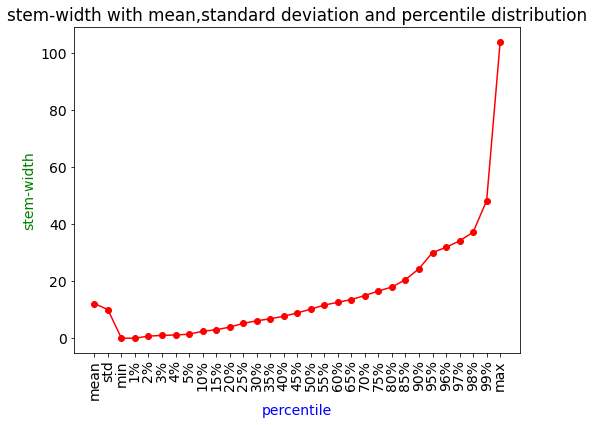

In [42]:
perc(df['stem-width'],'stem-width')

<p style="font-weight: bold;">outliers are after 99 percentile</p>

In [43]:
#outlier treatment
d=float(df1['stem-width'].quantile(.99))
df1['stem-width']=np.where(df1['stem-width']>d,d,df1['stem-width'])

<p style="font-weight: bold;">Cap-Diameter</p>

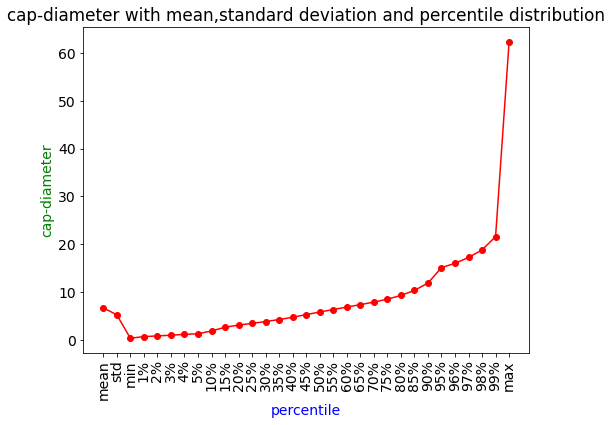

In [44]:
perc(df['cap-diameter'],'cap-diameter')

<p style="font-weight: bold;">outliers are after 99 percentile</p>

In [45]:
#outlier treatment
d=float(df1['cap-diameter'].quantile(.99))
df1['cap-diameter']=np.where(df1['cap-diameter']>d,d,df1['cap-diameter'])

<p style="font-weight: bold;">Stem-Height</p>

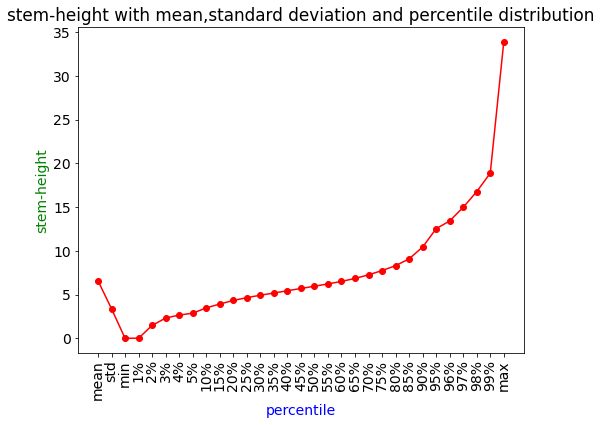

In [46]:
perc(df['stem-height'],'stem-height')

<p style="font-weight: bold;">outliers are after 99 percentile</p>

In [47]:
#outlier treatment
d=float(df1['stem-height'].quantile(.99))
df1['stem-height']=np.where(df1['stem-height']>d,d,df1['stem-height'])

### Indicator Columns

In [48]:
df1=pd.get_dummies(df1,columns=['edible-poisonous',  'cap-shape', 'cap-color',
                                'does-bruise-or-bleed', 'gill-attachment', 'gill-color',
                                'stem-color', 'has-ring', 'ring-type', 'habitat'],drop_first=True)

In [49]:
df1.head()

,cap-diameter,stem-height,stem-width,season,edible-poisonous_p,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,cap-shape_s,...,ring-type_p,ring-type_r,ring-type_z,habitat_g,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,5.75,6.13,14.93,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.27,0.00,0.00,3.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5.59,5.47,11.27,0.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.74,4.33,0.98,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9.60,10.84,28.52,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Multi-collinearity

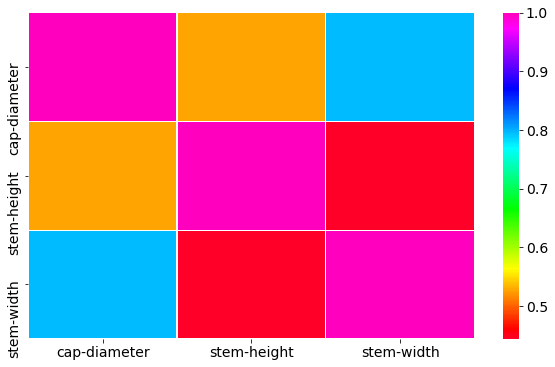

In [50]:
cor=df1[['cap-diameter','stem-height','stem-width']]
#creating correlation matrix and saving in excel
cor.corr().to_csv('cor.csv')
#creating plot for correlation for getting rough idea
f,ax=plt.subplots(figsize=(10,6))
sns.heatmap(cor.corr(),ax=ax,cmap="gist_rainbow", linewidths=0.1)
plt.show()

#### Above corr plot shows that all three column pocess strong relation with each other

In [51]:
#feature engineering
df1['add_cd_s_w']=df1['cap-diameter']+df1['stem-width']
df1['mul_add_cd_s_w_sh']=df1['add_cd_s_w']*df1['stem-height']

In [52]:
#function for checking VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif.sort_values(by='VIF', ascending=False))

In [53]:
X=df1.drop(['season','cap-diameter','stem-width','add_cd_s_w','stem-height','stem-height'],axis=1)
calc_vif(X)

,variables,VIF
46,stem-color_w,51.633661
41,stem-color_n,41.994217
49,ring-type_f,36.119162
34,gill-color_w,27.552740
11,cap-color_n,25.057386
...,...,...
62,habitat_w,1.259443
58,habitat_l,1.231138
60,habitat_p,1.165387
57,habitat_h,1.137651


In [54]:
X=df1.drop(['season','cap-diameter','stem-width','add_cd_s_w','stem-height','stem-height','stem-color_w'],axis=1)
#removing column stem-color_w
calc_vif(X)

,variables,VIF
48,ring-type_f,25.475701
11,cap-color_n,23.849474
34,gill-color_w,20.117497
35,gill-color_y,11.446307
29,gill-color_n,11.432850
...,...,...
59,habitat_p,1.161868
40,stem-color_l,1.158042
44,stem-color_r,1.155884
56,habitat_h,1.137386


In [55]:
X=df1.drop(['season','cap-diameter','stem-width','add_cd_s_w','stem-height','stem-height','stem-color_w','ring-type_f'],axis=1)
#removing column stem-color_w and ring-type_f
calc_vif(X)

,variables,VIF
11,cap-color_n,22.621991
34,gill-color_w,18.031270
29,gill-color_n,10.375532
35,gill-color_y,10.349508
26,gill-color_f,10.277161
...,...,...
58,habitat_p,1.156796
44,stem-color_r,1.154953
40,stem-color_l,1.147329
55,habitat_h,1.137385


In [56]:
X=df1.drop(['season','cap-diameter','stem-width','add_cd_s_w','stem-height','stem-height','stem-color_w','cap-color_n'],axis=1)
#removing column stem-color_w and cap-color_n
calc_vif(X)

,variables,VIF
47,ring-type_f,24.164520
33,gill-color_w,11.544804
25,gill-color_f,9.001964
34,gill-color_y,7.119259
6,cap-shape_x,6.699798
...,...,...
39,stem-color_l,1.157390
43,stem-color_r,1.152361
9,cap-color_k,1.149523
55,habitat_h,1.135877


In [57]:
X=df1.drop(['season','cap-diameter','stem-width','add_cd_s_w','stem-height','stem-height',
            'stem-color_w','gill-color_w'],axis=1)
#removing column stem-color_w and gill-color_w

calc_vif(X)

,variables,VIF
47,ring-type_f,22.833816
11,cap-color_n,13.686469
26,gill-color_f,7.001624
21,gill-attachment_f,6.539712
6,cap-shape_x,6.492925
...,...,...
58,habitat_p,1.161857
39,stem-color_l,1.156307
43,stem-color_r,1.154565
55,habitat_h,1.136759


In [58]:
X=df1.drop(['season','cap-diameter','stem-width','add_cd_s_w','stem-height','stem-height',
            'stem-color_w','gill-color_w','ring-type_f'],axis=1)
#removing column stem-color_w, gill-color_w and 'ring-type_f
calc_vif(X)

,variables,VIF
11,cap-color_n,8.603109
26,gill-color_f,7.000683
21,gill-attachment_f,6.507479
6,cap-shape_x,5.945967
17,cap-color_y,4.033079
...,...,...
57,habitat_p,1.156364
43,stem-color_r,1.154170
39,stem-color_l,1.147252
54,habitat_h,1.136704


In [59]:
X=df1.drop(['season','cap-diameter','stem-width','add_cd_s_w','stem-height','stem-height',
            'stem-color_w','cap-color_n','ring-type_f','gill-color_f'],axis=1)
#removing column stem-color_w, gill-color_w ,'ring-type_f and gill-color_f
calc_vif(X)

,variables,VIF
6,cap-shape_x,5.957608
32,gill-color_w,5.853088
33,gill-color_y,4.042167
27,gill-color_n,3.587460
2,cap-shape_f,3.434432
45,has-ring_t,3.105284
59,mul_add_cd_s_w_sh,3.026411
0,edible-poisonous_p,2.992234
29,gill-color_p,2.988749
5,cap-shape_s,2.775728


In [60]:
X=df1.drop(['season','cap-diameter','stem-width','add_cd_s_w','stem-height','stem-height',
            'stem-color_w','cap-color_n','ring-type_f','gill-color_f','cap-shape_x'],axis=1)
#removing column stem-color_w, gill-color_w ,'ring-type_f , gill-color_f and cap-shape_x
calc_vif(X)

,variables,VIF
31,gill-color_w,3.948796
32,gill-color_y,3.159002
44,has-ring_t,3.105059
58,mul_add_cd_s_w_sh,2.985442
0,edible-poisonous_p,2.943308
26,gill-color_n,2.740221
38,stem-color_n,2.563858
17,gill-attachment_d,2.494726
28,gill-color_p,2.352887
3,cap-shape_o,2.201270


maximum VIF is less than 5 so Aceepting the the columns present in X df

In [61]:
X.head()

,edible-poisonous_p,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,cap-shape_s,cap-color_e,cap-color_g,cap-color_k,cap-color_l,...,ring-type_r,ring-type_z,habitat_g,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,mul_add_cd_s_w_sh
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,126.7684
1,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0000
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,92.2242
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.4476
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,413.2208


In [62]:
X.shape

(61069, 59)

In [63]:
X.columns

Index(['edible-poisonous_p', 'cap-shape_c', 'cap-shape_f', 'cap-shape_o',
       'cap-shape_p', 'cap-shape_s', 'cap-color_e', 'cap-color_g',
       'cap-color_k', 'cap-color_l', 'cap-color_o', 'cap-color_p',
       'cap-color_r', 'cap-color_u', 'cap-color_w', 'cap-color_y',
       'does-bruise-or-bleed_t', 'gill-attachment_d', 'gill-attachment_e',
       'gill-attachment_f', 'gill-attachment_p', 'gill-attachment_s',
       'gill-attachment_x', 'gill-color_e', 'gill-color_g', 'gill-color_k',
       'gill-color_n', 'gill-color_o', 'gill-color_p', 'gill-color_r',
       'gill-color_u', 'gill-color_w', 'gill-color_y', 'stem-color_e',
       'stem-color_f', 'stem-color_g', 'stem-color_k', 'stem-color_l',
       'stem-color_n', 'stem-color_o', 'stem-color_p', 'stem-color_r',
       'stem-color_u', 'stem-color_y', 'has-ring_t', 'ring-type_g',
       'ring-type_l', 'ring-type_m', 'ring-type_p', 'ring-type_r',
       'ring-type_z', 'habitat_g', 'habitat_h', 'habitat_l', 'habitat_m',
       'hab

In [64]:
df2=df1.drop(['cap-diameter','stem-width','add_cd_s_w','stem-height','stem-height',
            'stem-color_w','cap-color_n','ring-type_f','gill-color_f','cap-shape_x'],axis=1)
#Dropping those column which increses the vif

In [65]:
#Again dividing the table in to test and train
train=df2.iloc[:42748]
test=df2.iloc[42749:]

In [66]:
test.reset_index(inplace=True)#resetting index
test.drop('index',axis=1,inplace=True)#dropping index column

C:\Users\Nikhil\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [67]:
test.head()

,season,edible-poisonous_p,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,cap-shape_s,cap-color_e,cap-color_g,cap-color_k,...,ring-type_r,ring-type_z,habitat_g,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,mul_add_cd_s_w_sh
0,NaN,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,282.9676
1,NaN,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,162.5754
2,NaN,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,202.1669
3,NaN,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,8.4005
4,NaN,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,696.6632


#### operation on train data frame

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
#dividing X and Y columns
y=train['season']
X=train.drop('season',axis=1)

In [70]:
print(y)

0        0.0
1        3.0
2        0.0
3        0.0
4        1.0
        ... 
42743    0.0
42744    1.0
42745    2.0
42746    1.0
42747    0.0
Name: season, Length: 42748, dtype: float64


In [71]:
X_train,val_x,y_train,val_y=train_test_split(X,y,test_size=.25,random_state=88)

In [72]:
print('Shape of train df :{}'.format(train.shape))

print('Shape of X_train df :{}'.format(X_train.shape))

print('Shape of y_train df :{}'.format(y_train.shape))

print('Shape of val_x df :{}'.format(val_x.shape))

print('Shape of val_y df :{}'.format(val_y.shape))

Shape of train df :(42748, 60)
Shape of X_train df :(32061, 59)
Shape of y_train df :(32061,)
Shape of val_x df :(10687, 59)
Shape of val_y df :(10687,)


### Standardizing by Min Max Scalor

In [73]:
from sklearn.preprocessing import MinMaxScaler

In [74]:
m= MinMaxScaler()
X_train_m= m.fit_transform(X_train)
val_x_m=m.transform(val_x)
X_train_m= pd.DataFrame(X_train_m,columns=X_train.columns)
X_train_m.head(1)

,edible-poisonous_p,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,cap-shape_s,cap-color_e,cap-color_g,cap-color_k,cap-color_l,...,ring-type_r,ring-type_z,habitat_g,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,mul_add_cd_s_w_sh
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.027482


### Model Training

#### Random Forest


In [75]:
rf=RandomForestClassifier()
model_1=rf.fit(X_train_m,y_train)
print("train accuracy:", model_1.score(X_train_m,y_train))
print("test accuracy:", model_1.score(val_x_m,val_y))

train accuracy: 0.9894887869997817
test accuracy: 0.5091232338355011


In [76]:
#hyper parameter tunning

parameters = {
             'criterion':('gini', 'entropy'), 
             "bootstrap":[True,False],#(simple random sampling with replacement)
             "n_estimators":[5,7,9,11],#(no. of columns used for sampling)
             'min_samples_split':[2,3,4,5],
              'max_depth':[2,4,6,8,9,10,11,12],
              "min_samples_leaf":[5,10]
             }

tr = RandomForestClassifier()

gsearch1 = GridSearchCV(tr, parameters, cv=10, verbose=1, n_jobs=-1)
gsearch1.fit(X_train_m,y_train)

Fitting 10 folds for each of 1024 candidates, totalling 10240 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ('gini', 'entropy'),
                         'max_depth': [2, 4, 6, 8, 9, 10, 11, 12],
                         'min_samples_leaf': [5, 10],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [5, 7, 9, 11]},
             verbose=1)

In [77]:
gsearch1.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 11,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 5}

In [78]:
gsearch1.best_score_

0.5197591590915147

In [82]:
rf1=RandomForestClassifier( bootstrap= False,
                            criterion= 'gini',
                            max_depth= 11,
                            min_samples_leaf = 5,
                            min_samples_split= 4,
                            n_estimators = 5)
model_rf=rf1.fit(X_train_m,y_train)
print("train accuracy=", model_rf.score(X_train_m,y_train))
print("test accuracy=", model_rf.score(val_x_m,val_y))

train accuracy= 0.5632076354449331
test accuracy= 0.5068775147375316


In [83]:
pred_train_rf=model_rf.predict(X_train_m)
pred_test_rf=model_rf.predict(val_x_m)
print("train_report")
print(metrics.classification_report(y_train,pred_train_rf))
print("*************************************************************************************")
print("test_report")
print(metrics.classification_report(val_y,pred_test_rf))

train_report
              precision    recall  f1-score   support

         0.0       0.55      0.89      0.68     15877
         1.0       0.60      0.29      0.39     12022
         2.0       0.54      0.07      0.13      2769
         3.0       0.71      0.22      0.34      1393

    accuracy                           0.56     32061
   macro avg       0.60      0.37      0.39     32061
weighted avg       0.58      0.56      0.51     32061

*************************************************************************************
test_report
              precision    recall  f1-score   support

         0.0       0.51      0.84      0.64      5226
         1.0       0.47      0.22      0.30      4033
         2.0       0.32      0.04      0.07       929
         3.0       0.65      0.18      0.28       499

    accuracy                           0.51     10687
   macro avg       0.49      0.32      0.32     10687
weighted avg       0.49      0.51      0.44     10687



In [85]:
test.drop('season',axis=1,inplace=True)

C:\Users\Nikhil\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [86]:
submission=model_rf.predict(test)

In [87]:
test['season']=submission

<ipython-input-87-34abaf64798e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['season']=submission


In [88]:
test['season'].unique()

array([0., 1., 3., 2.])

In [89]:
test['season']=test['season'].astype('int64')#changing data type from float to integer

<ipython-input-89-d97e0c2a8d20>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['season']=test['season'].astype('int64')#changing data type from float to integer


In [90]:
#season is categorical making them numerical
def season_cate(x):
    if x==0:
        return 'a'
    elif x==1:
        return 'u'
    elif x==2:
        return 'w'
    else:
        return 's'

test['season']=test['season'].apply(season_cate)


<ipython-input-90-f8c7dd1fa5a8>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['season']=test['season'].apply(season_cate)


In [91]:
test['season'].value_counts()

a    15962
u     2045
s      174
w      139
Name: season, dtype: int64

In [92]:
test.reset_index(inplace=True)
submission_rf=test['season']
submission_rf.to_csv('submission_nikhil_rf.csv')